In [61]:
pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=132362 sha256=f348dd5bf069ded2c6c26f7c5f8f7c7ec7627358c46e7544854ed105a76ee6e1
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-qyft0uax/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [62]:
"""
# C2 fine tuned
def border_swap(problem, next_gen, child, schedule):
    if schedule is None:
        print("order is none.")
        return next_gen
    if len(next_gen) == 0:
        next_gen.append(child)
        return next_gen
    else:
        for i in schedule:
            if schedule[i] == -1 and i < len(schedule) - 1:
                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]
            temp_schedule = [i for i in schedule if i != -1]
            # check if the switched work better
            if problem.eval_fitness(temp_schedule) >= problem.eval_fitness(child):
                next_gen.append(temp_schedule)
                return next_gen
            else:
                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]
    # if nothing improved
    temp_schedule = [i for i in schedule if i != -1]
    next_gen.append(temp_schedule)
    return next_gen
"""

'\n# C2 fine tuned\ndef border_swap(problem, next_gen, child, schedule):\n    if schedule is None:\n        print("order is none.")\n        return next_gen\n    if len(next_gen) == 0:\n        next_gen.append(child)\n        return next_gen\n    else:\n        for i in schedule:\n            if schedule[i] == -1 and i < len(schedule) - 1:\n                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]\n            temp_schedule = [i for i in schedule if i != -1]\n            # check if the switched work better\n            if problem.eval_fitness(temp_schedule) >= problem.eval_fitness(child):\n                next_gen.append(temp_schedule)\n                return next_gen\n            else:\n                schedule[i-1], schedule[i+1] = schedule[i+1], schedule[i-1]\n    # if nothing improved\n    next_gen.append(temp_schedule)\n    return next_gen\n'

In [63]:
import mlrose_hiive as mh

In [64]:
#help(mh.runners)

In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/ipykernel_8107/1000570959.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [2]:
import pandas as pd
import utility as u
import importlib

In [67]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [68]:
size = 108
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [69]:
"""
with open("108_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)
"""

'\nwith open("108_tasks.txt", "a") as f:\n    for t in tasks:\n        print(t.task_id, t.duration, t.deadline, t.profit, file=f)\n'

In [70]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [71]:
problem_ffp.length

108

In [72]:
problem_ffp.fitness

245.0

In [73]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[40, 50, 60],
              mutation_rates=[0.07, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [74]:
df_run_curves_ffp.shape

(12294, 7)

In [75]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.027557,274.0,0.0,40,0.07,2048
1,1,0.130212,376.0,80.0,40,0.07,2048
2,2,0.166623,376.0,161.0,40,0.07,2048
3,3,0.208836,376.0,240.0,40,0.07,2048
4,4,0.299890,383.0,320.0,40,0.07,2048


In [76]:
df_run_curves_ffp['Fitness'].max()

801.0

In [77]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
12124,1879,46.708293,801.0,226131.0,60,0.08,2048
12125,1880,46.723120,801.0,226250.0,60,0.08,2048
12126,1881,46.740606,801.0,226369.0,60,0.08,2048
12127,1882,46.757366,801.0,226488.0,60,0.08,2048
12128,1883,46.771659,801.0,226607.0,60,0.08,2048
...,...,...,...,...,...,...,...
12289,2044,49.554823,801.0,245766.0,60,0.08,2048
12290,2045,49.568097,801.0,245885.0,60,0.08,2048
12291,2046,49.579880,801.0,246004.0,60,0.08,2048
12292,2047,49.598496,801.0,246123.0,60,0.08,2048


In [78]:
# need to check Time and FEvals

In [79]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [80]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
12124,1879,46.708293,801.0,226131.0,60,0.08,2048
12125,1880,46.723120,801.0,226250.0,60,0.08,2048
12126,1881,46.740606,801.0,226369.0,60,0.08,2048
12127,1882,46.757366,801.0,226488.0,60,0.08,2048
12128,1883,46.771659,801.0,226607.0,60,0.08,2048
...,...,...,...,...,...,...,...
12289,2044,49.554823,801.0,245766.0,60,0.08,2048
12290,2045,49.568097,801.0,245885.0,60,0.08,2048
12291,2046,49.579880,801.0,246004.0,60,0.08,2048
12292,2047,49.598496,801.0,246123.0,60,0.08,2048


In [81]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,60,0.08,226131.0,1963.5,46.708293


In [82]:
# tentatively, pick pop size = 60 and mutation_rate = 0.08, as the only choice

In [83]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.027557,274.0,0.0,40,0.07,2048
1,1,0.130212,376.0,80.0,40,0.07,2048
2,2,0.166623,376.0,161.0,40,0.07,2048
3,3,0.208836,376.0,240.0,40,0.07,2048
4,4,0.299890,383.0,320.0,40,0.07,2048


In [84]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [85]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GAJSRunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[50], # 20 bits in total
              mutation_rates=[0.07])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [86]:
df_iter_curves_ffp.shape

(20490, 7)

In [87]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.004901,274.0,0.0,50,0.07,2048
1,1,0.051449,400.0,100.0,50,0.07,2048
2,2,0.121316,416.0,200.0,50,0.07,2048
3,3,0.179247,416.0,299.0,50,0.07,2048
4,4,0.222583,416.0,398.0,50,0.07,2048


In [88]:
df_iter_curves_ffp.Fitness.max()

866.0

In [3]:
#df_iter_curves_ffp.to_csv('gab_mutate_tuned_C2_js_108.csv')
import pandas as pd
df_iter_curves_ffp = pd.read_csv('../../csv-files/gab_mutate_tuned_C2_js_108.csv')

In [90]:
df_iter_curves_ffp.Iteration.max()

2048

In [4]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [92]:
df_fitness_iter_ffp.shape

(2049, 3)

In [93]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,316.3,1212.011111
1,1,387.0,77.111111
2,2,392.2,157.733333
3,3,393.3,125.344444
4,4,394.2,129.511111


In [94]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

2030    2030
2031    2031
2032    2032
2033    2033
2034    2034
2035    2035
2036    2036
2037    2037
2038    2038
2039    2039
2040    2040
2041    2041
2042    2042
2043    2043
2044    2044
2045    2045
2046    2046
2047    2047
2048    2048
Name: Iteration, dtype: int64

In [95]:
# converge point-never converged
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [5]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [97]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,316.3,1212.011111,34.813950
1,1,387.0,77.111111,8.781293
2,2,392.2,157.733333,12.559193
3,3,393.3,125.344444,11.195733
4,4,394.2,129.511111,11.380295


Text(0, 0.5, 'Fitness')

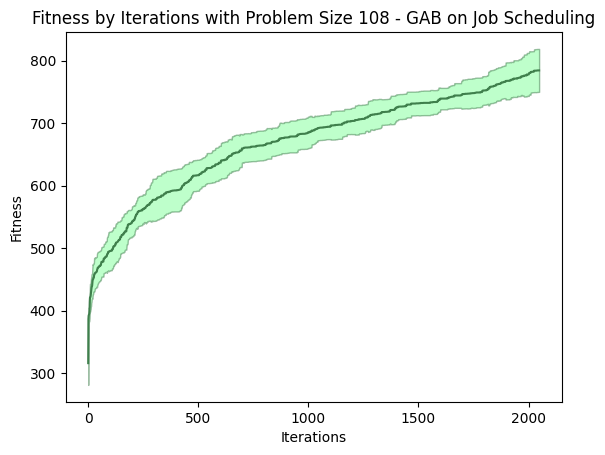

In [98]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - GAB on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [6]:
# elbow analysis
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, S=1.0, curve="concave", direction="increasing")

print(kneedle.knee)

32


In [7]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration'] == kneedle.knee]

,Iteration,avg_fitness,var_fitness,stddev_fitness
32,32,460.8,611.288889,24.724257


In [99]:
df_fitness_iter_ffp.avg_fitness.max()

784.2

In [100]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

35.7586042481775

In [101]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(343    343
 Name: Iteration, dtype: int64,)

In [102]:
# Fevals - iteration

In [2]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [3]:
df_FEvals_iter_ffp.avg_FEvals.max()

214353.5

In [104]:
df_FEvals_iter_ffp.shape

(2049, 3)

In [105]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,101.5,4.277778
2,2,202.2,17.288889
3,3,302.9,47.877778
4,4,403.0,65.333333


In [106]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [107]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 22384.350784520073)

In [108]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,101.5,4.277778,2.068279
2,2,202.2,17.288889,4.157991
3,3,302.9,47.877778,6.919377
4,4,403.0,65.333333,8.082904


Text(0, 0.5, 'FEvals')

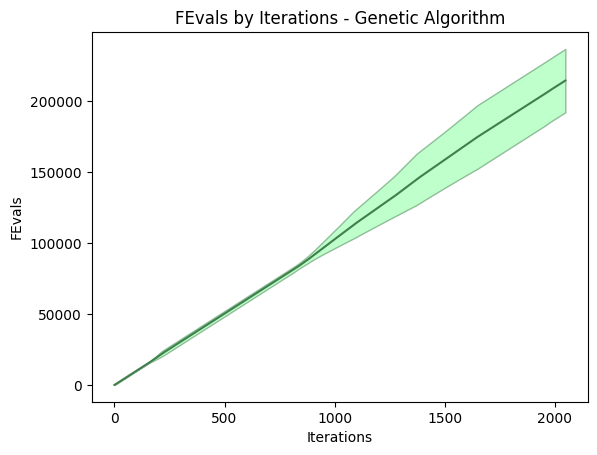

In [109]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [110]:
# fitness - wall clock time

In [111]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [112]:
df_time_iter_ffp.shape

(2049, 3)

In [113]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.002945,7.977041e-07
1,1,0.022162,1.088939e-04
2,2,0.043656,7.511848e-04
3,3,0.064289,1.647668e-03
4,4,0.081348,2.484527e-03


In [114]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [115]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.002945,7.977041e-07,0.000893
1,1,0.022162,1.088939e-04,0.010435
2,2,0.043656,7.511848e-04,0.027408
3,3,0.064289,1.647668e-03,0.040591
4,4,0.081348,2.484527e-03,0.049845


Text(0, 0.5, 'Time')

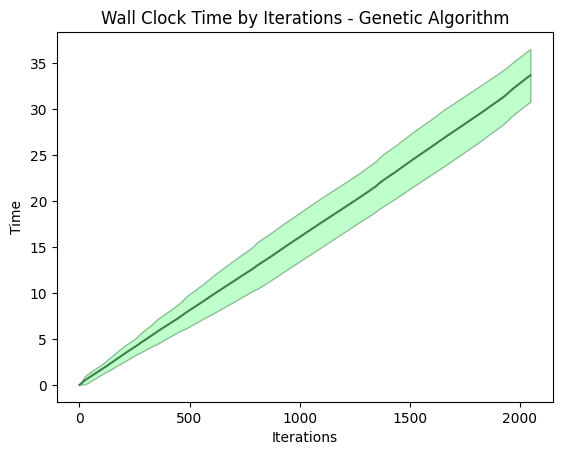

In [116]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [117]:
df_time_iter_ffp.stddev_time.max()

3.0767549344319387

In [118]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

1659    1659
Name: Iteration, dtype: int64

In [119]:
df_time_iter_ffp.avg_time.max()

33.67496007680311